# Friedman test / Wilcoxon test
### Исследовательский вопрос: Динамика среднедушевого ВВП в ценах 2015 года по странам изменяются синхронно?
#### H0: Последовательные пары среднедушевого ВВП изменяются незначимо
#### Ha: Хотя бы одна последовательная пара среднедушевого ВВП изменяются значимо
#### Уровень значимости: 5%


In [104]:
import numpy as np
from scipy import stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [105]:
df=pd.read_excel(r'Data.xls')
df=df.dropna()

In [106]:
df.head(5)

,Country Name,Country Code,Indicator Name,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),1507.800256,1501.671310,1507.821357,1507.861055,1499.256275,1418.380523
2,Afghanistan,AFG,GDP per capita (constant 2015 US$),578.466353,575.334442,575.707053,568.827927,577.563058,553.489126
3,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),1886.248158,1838.271128,1830.381840,1834.366604,1843.558468,1778.989069
4,Angola,AGO,GDP per capita (constant 2015 US$),4166.979833,3924.620471,3790.791565,3595.106667,3458.650512,3213.784200
5,Albania,ALB,GDP per capita (constant 2015 US$),3952.801215,4090.363323,4249.793850,4433.741739,4549.457441,4424.310223


In [107]:
df.describe()

,2015,2016,2017,2018,2019,2020
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,12554.503683,12730.239659,12985.319266,13240.799225,13383.151058,12439.715149
std,17290.467935,17485.166716,17806.263682,18167.566370,18257.840149,17089.597394
min,293.455172,293.659705,286.431522,281.970226,278.319365,270.691443
25%,1882.337907,1861.217149,1858.581816,1888.659104,1948.700264,1793.067100
50%,5402.245114,5492.510822,5643.405482,5755.591654,5674.792904,5219.360950
75%,13778.219062,14104.559124,14653.614077,15036.464611,15280.243075,14130.299083
max,101376.496574,103753.580730,103085.673723,104261.936716,104583.715896,101206.753768


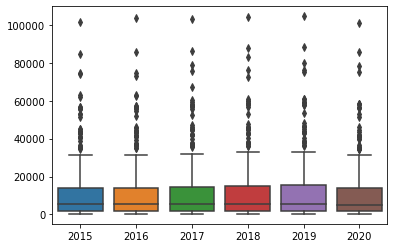

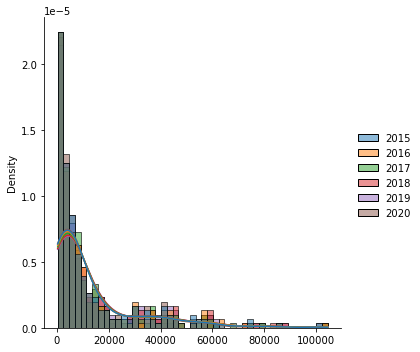

In [108]:
sns.boxplot(data=df)

sns.displot(df, stat='density', kde=True)

In [109]:
ss.friedmanchisquare(df['2015'],df['2016'],df['2017'],df['2018'],df['2019'],df['2020'])

FriedmanchisquareResult(statistic=422.6265664160401, pvalue=3.932242627972049e-89)

###  Хотя бы одна пара ВВП отличаются значимо

### Данные распределены ненормально

In [110]:
df_result=pd.DataFrame({'Column_1':[],'Column_2':[],'P-value':[], 'Shapiro Column1':[]})

for i in range(3,len(df.columns)-1):
    a_name=df.iloc[:,i].name
    a=df[a_name]
    b_name=df.iloc[:,i+1].name
    b=df[b_name]
    c=ss.wilcoxon(a,b)[1]
    d=ss.shapiro(a)
    df_result=pd.DataFrame(np.array([[a_name,b_name,c,d[1]]]), columns=['Column_1', 'Column_2', 'P-value','Shapiro Column1']).append(df_result, ignore_index=True)
print(df_result)

  Column_1 Column_2                 P-value         Shapiro Column1
0     2019     2020   8.195195848538284e-33   5.274368218810636e-20
1     2018     2019   3.916238026397653e-18   4.292207886794983e-20
2     2017     2018  1.1944938870980375e-23  4.4266134272249125e-20
3     2016     2017  1.8415212895525513e-21   4.185203027273299e-20
4     2015     2016   4.509156837887567e-18   3.893500369195888e-20


### Ненормальность распределения ВВП подтвержается на 1% уровне значимости тестом Шапиро-Вилка

### H0 отклоняется. Все последовательные пары среднедушевого ВВП изменяются синхронно значимо на 1% уровне значимости.

1) Критерий Уилкоксона: https://medstatistic.ru/methods/methods3.html
2) Тест Фридмана: https://sixsigmastudyguide.com/friedman-non-parametric-hypothesis-test/